# Baseball Case Study

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
pd.set_option('display.max_rows',None)

Basic outlook of the Data.

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.shape

(30, 17)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Observations:
1. No catagorical data.
2. ERA (Earned Run Average had float data).

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:
1. The difference between 75th percentile and max is less.
2. Less Outliers present.

In [13]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Observations:
    1.Zero null values.

Importing the required Dictionaries

In [120]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis

Univariate Analysis

In [16]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Column 1:W (Number of Wins)

In [17]:
df['W'].describe()

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64

Observations:
1.No much difference in the mean and median present, so the distribution must be normal curve.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='W', ylabel='Density'>

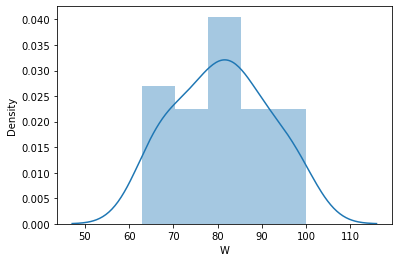

In [18]:
sns.distplot(df['W'])

<AxesSubplot:>

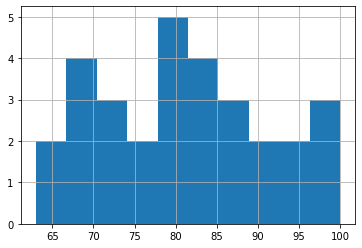

In [19]:
df['W'].hist(grid=True)

Observations:
1.Most of the wins are about 80 which occurs around 5 times.

Column 2.R (Runs)

In [21]:
df['R'].describe()

count     30.000000
mean     688.233333
std       58.761754
min      573.000000
25%      651.250000
50%      689.000000
75%      718.250000
max      891.000000
Name: R, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

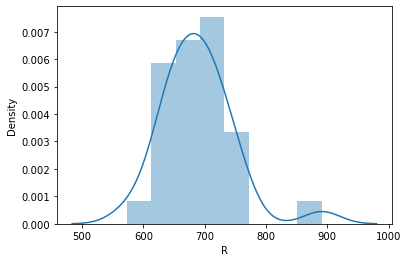

In [22]:
sns.distplot(df['R'])

<AxesSubplot:>

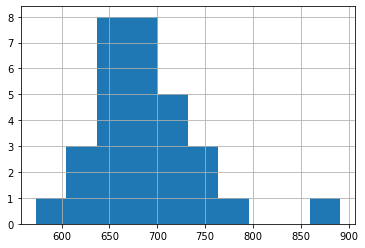

In [23]:
df['R'].hist(grid=True)

Observations:
1.We can see that average runs scored is around 688 and most of the runs are scored from 640 to 700,  and there is one case where run scored is 891.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R'>

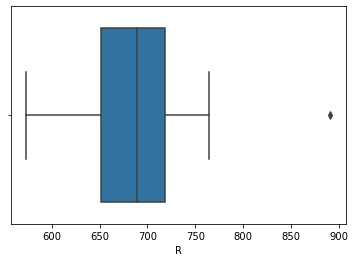

In [24]:
sns.boxplot(df['R'])

Observations:
1.There is an outlier, as we already saw one case at  891 score in histogram.

Column 3: AB (At Bats)

In [25]:
df['AB'].describe()

count      30.000000
mean     5516.266667
std        70.467372
min      5385.000000
25%      5464.000000
50%      5510.000000
75%      5570.000000
max      5649.000000
Name: AB, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AB', ylabel='Density'>

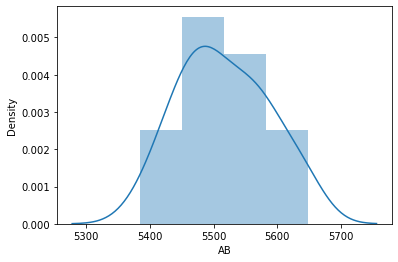

In [28]:
sns.distplot(df['AB'])

<AxesSubplot:>

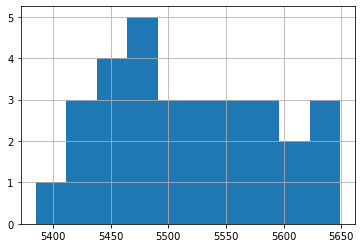

In [29]:
df['AB'].hist(grid=True)

Observations:
    1.At bats range from 5400 to 5650 and in that range every team secured to have at bats for three times, which is common.
    2.Least skewness is present.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AB'>

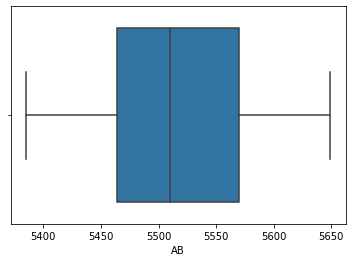

In [30]:
sns.boxplot(df['AB'])

Observations:
1.Zero outliers.

Column 4 : H (hits)

In [31]:
df['H'].describe()

count      30.000000
mean     1403.533333
std        57.140923
min      1324.000000
25%      1363.000000
50%      1382.500000
75%      1451.500000
max      1515.000000
Name: H, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='H', ylabel='Density'>

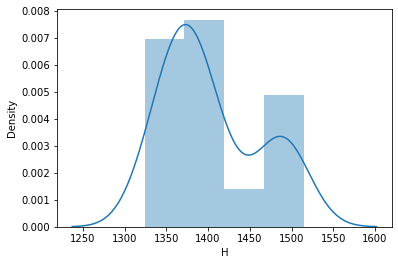

In [32]:
sns.distplot(df['H'])

<AxesSubplot:>

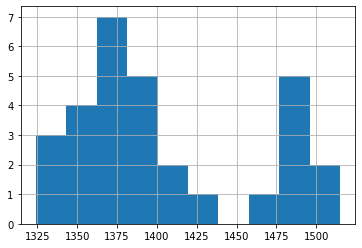

In [33]:
df['H'].hist(grid=True)

Observations:
1.Since mean is more than the median and also from the graph it is positively skewed or right skewed.
2.For this the mode is 1375 repeating for highest number of times thats 7 times.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='H'>

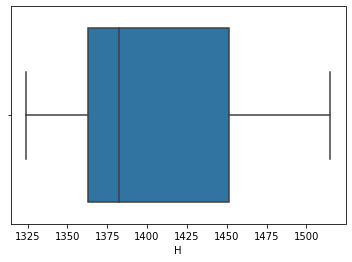

In [34]:
sns.boxplot(df['H'])

Observations:
1.No outliers.

Column 5: 2B (Doubles)

In [35]:
df['2B'].describe()

count     30.000000
mean     274.733333
std       18.095405
min      236.000000
25%      262.250000
50%      275.500000
75%      288.750000
max      308.000000
Name: 2B, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2B', ylabel='Density'>

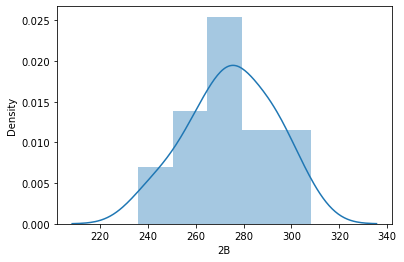

In [36]:
sns.distplot(df['2B'])

<AxesSubplot:>

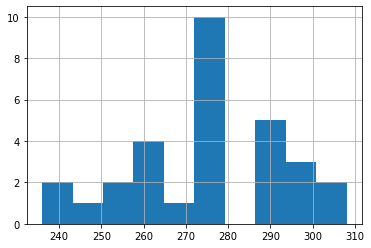

In [37]:
df['2B'].hist(grid=True)

Observations:
   1.The graph is slightly negatively skewed since median is more than mean,and mode in this case is 270 to 280 repeating for 10 times.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2B'>

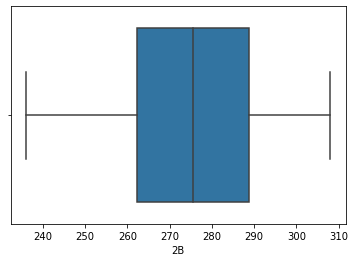

In [38]:
sns.boxplot(df['2B'])

Obsevations:
1.No outliers.

Column 6: 3B (Triples)

In [39]:
df['3B'].describe()

count    30.000000
mean     31.300000
std      10.452355
min      13.000000
25%      23.000000
50%      31.000000
75%      39.000000
max      49.000000
Name: 3B, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='3B', ylabel='Density'>

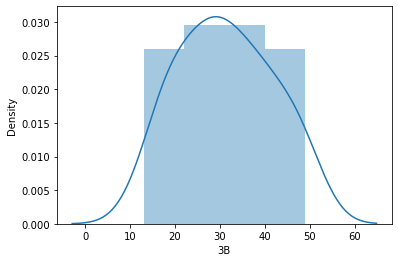

In [40]:
sns.distplot(df['3B'])

<AxesSubplot:>

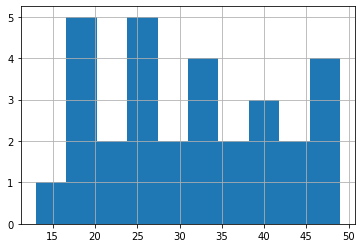

In [41]:
df['3B'].hist(grid=True)

Observations:
    1.The mean and median is almost same so there is no distortions in the graph, and here we have two modes occuring for 5 times for the values of 16-20 and 24-27.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3B'>

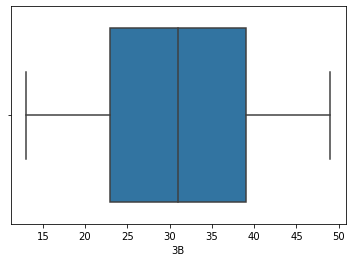

In [42]:
sns.boxplot(df['3B'])

Observations:
    1.No outliers.

Column 7: HR (Homeruns)

In [43]:
df['HR'].describe()

count     30.000000
mean     163.633333
std       31.823309
min      100.000000
25%      140.250000
50%      158.500000
75%      177.000000
max      232.000000
Name: HR, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HR', ylabel='Density'>

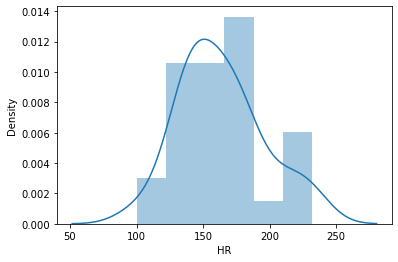

In [44]:
sns.distplot(df['HR'])

<AxesSubplot:>

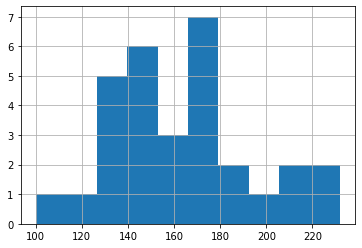

In [45]:
df['HR'].hist(grid=True)

Observations:
1.We can see that minimum there will be atleast one home run and maximum is 7.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HR'>

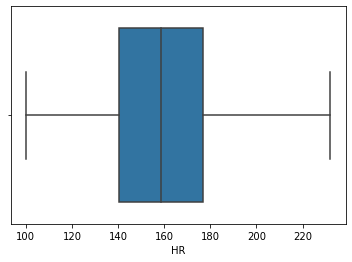

In [46]:
sns.boxplot(df['HR'])

Observations:
    1.No outliers.

Column 8: Walks

In [47]:
df['BB'].describe()

count     30.000000
mean     469.100000
std       57.053725
min      375.000000
25%      428.250000
50%      473.000000
75%      501.250000
max      570.000000
Name: BB, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BB', ylabel='Density'>

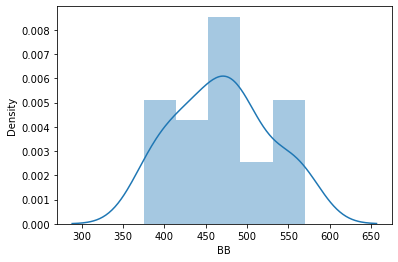

In [48]:
sns.distplot(df['BB'])

<AxesSubplot:>

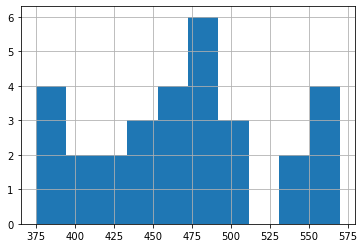

In [49]:
df['BB'].hist(grid=True)

Observations:
    1.On an average there are three walks.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BB'>

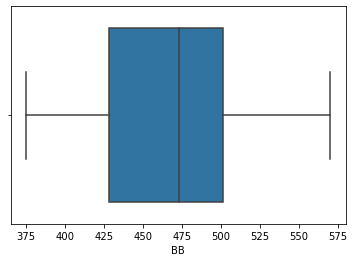

In [50]:
sns.boxplot(df['BB'])

Observations:
    1.No outliers.

Column 9: SO (Strikeouts)

In [53]:
df['SO'].describe()

count      30.00000
mean     1248.20000
std       103.75947
min       973.00000
25%      1157.50000
50%      1261.50000
75%      1311.50000
max      1518.00000
Name: SO, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SO', ylabel='Density'>

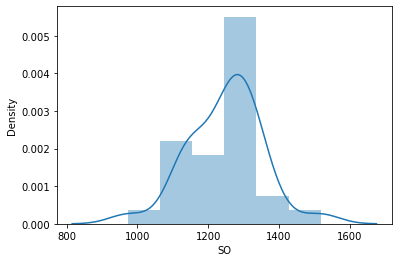

In [54]:
sns.distplot(df['SO'])

<AxesSubplot:>

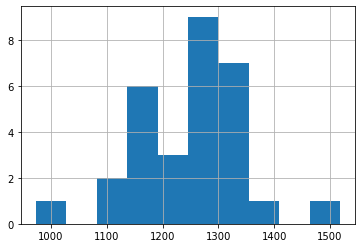

In [55]:
df['SO'].hist(grid=True)

Observations:
    1.Slight left skewed observed and the mode is of 9 times for the value 1250 to 1300.

Column 10: (SB) Stolen Bases

In [56]:
df['SB'].describe()

count     30.000000
mean      83.500000
std       22.815225
min       44.000000
25%       69.000000
50%       83.500000
75%       96.500000
max      134.000000
Name: SB, dtype: float64

Observations:
1.Since mean and median are same there is no sort of distortions in the distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SB', ylabel='Density'>

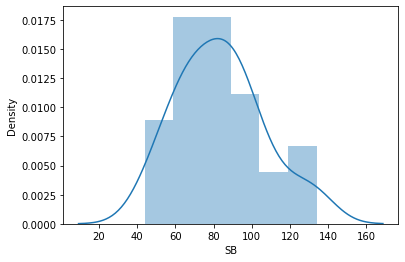

In [57]:
sns.distplot(df['SB'])

<AxesSubplot:>

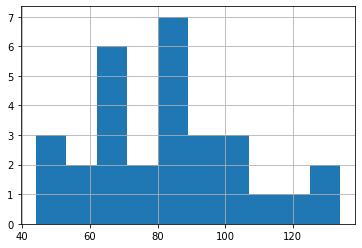

In [58]:
df['SB'].hist(grid=True)

Observations:
1.The highest observations is from 80 to 90 that is 7 times.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SB'>

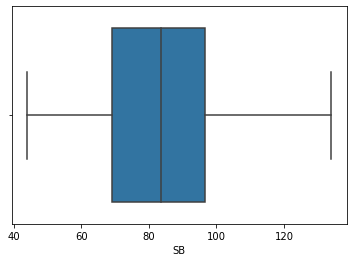

In [59]:
sns.boxplot(df['SB'])

Observations:
1.No outliers.

Column 11.RA (Runs allowwed)

In [60]:
df['RA'].describe()

count     30.000000
mean     688.233333
std       72.108005
min      525.000000
25%      636.250000
50%      695.500000
75%      732.500000
max      844.000000
Name: RA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RA', ylabel='Density'>

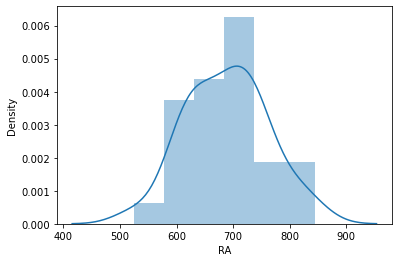

In [61]:
sns.distplot(df['RA'])

<AxesSubplot:>

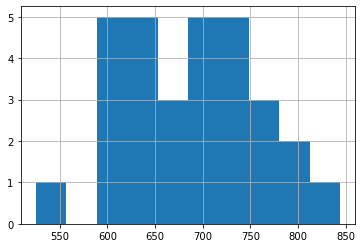

In [62]:
df['RA'].hist(grid=True)

Observations:
1.The value Runs allowed ranges from 590 to 840 and each value is repeated almost 3 times on an average.
2.There is no much significant distortion in the graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RA'>

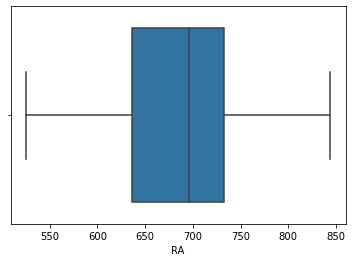

In [63]:
sns.boxplot(df['RA'])

Observations:
    1.No outliers.

Column 12: (ER) Earned Runs

In [64]:
df['ER'].describe()

count     30.000000
mean     635.833333
std       70.140786
min      478.000000
25%      587.250000
50%      644.500000
75%      679.250000
max      799.000000
Name: ER, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ER', ylabel='Density'>

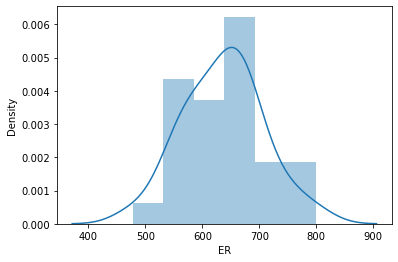

In [65]:
sns.distplot(df['ER'])

<AxesSubplot:>

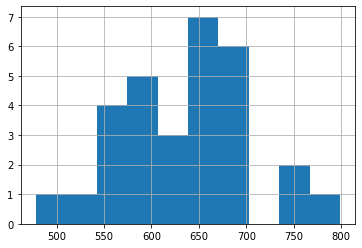

In [66]:
df['ER'].hist(grid=True)

Observations:
    1.We can see that most of the values are between 540 and 700,The graph is not much distorted.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ER'>

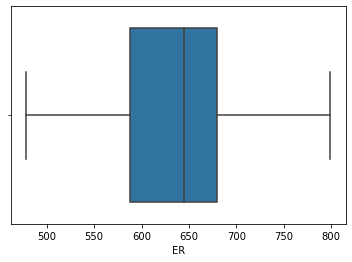

In [67]:
sns.boxplot(df['ER'])

Observations:
    1.No outliers.

Column 13: ERA (Earned Run Averaged)

In [68]:
df['ERA'].describe()

count    30.000000
mean      3.956333
std       0.454089
min       2.940000
25%       3.682500
50%       4.025000
75%       4.220000
max       5.040000
Name: ERA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ERA', ylabel='Density'>

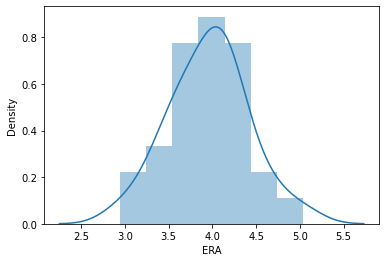

In [69]:
sns.distplot(df['ERA'])

<AxesSubplot:>

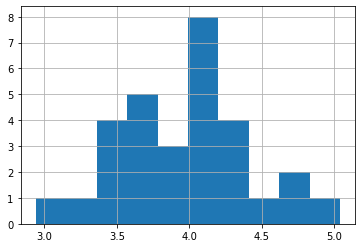

In [70]:
df['ERA'].hist(grid=True)

Observations:
1.We can see that most of the values are between 3.4 to 4.4

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ERA'>

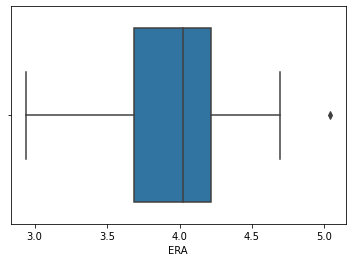

In [71]:
sns.boxplot(df['ERA'])

Observations:
    1.One outlier present.

Column 14: CG (Complete Games)

In [72]:
df['CG'].describe()

count    30.000000
mean      3.466667
std       2.763473
min       0.000000
25%       1.000000
50%       3.000000
75%       5.750000
max      11.000000
Name: CG, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

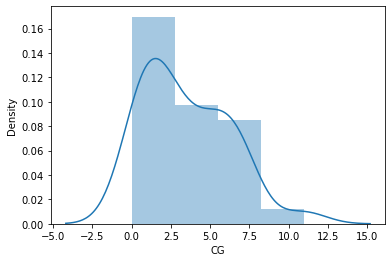

In [73]:
sns.distplot(df['CG'])

<AxesSubplot:>

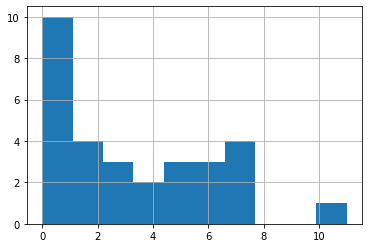

In [74]:
df['CG'].hist(grid=True)

Observations:
1.Most of the values are between the range of 0 to 0.5 and have significanat values upto 7.9.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CG'>

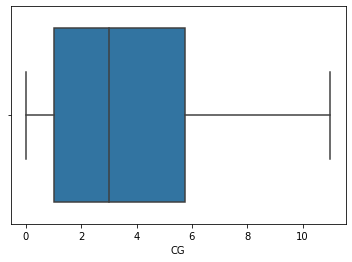

In [75]:
sns.boxplot(df['CG'])

Observations:
1.No outliers.

Column 15: SHO (Shoutouts)

In [76]:
df['SHO'].describe()

count    30.000000
mean     11.300000
std       4.120177
min       4.000000
25%       9.000000
50%      12.000000
75%      13.000000
max      21.000000
Name: SHO, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHO', ylabel='Density'>

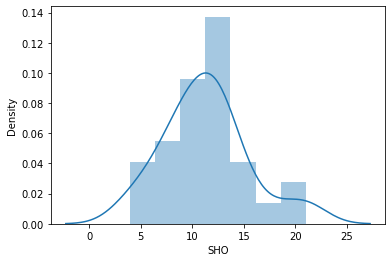

In [77]:
sns.distplot(df['SHO'])

<AxesSubplot:>

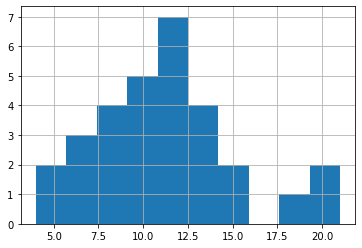

In [78]:
df['SHO'].hist(grid=True)

Observations:
1.We can see that there is increase in the values from 3 to 16.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SHO'>

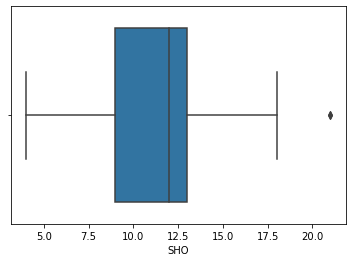

In [79]:
sns.boxplot(df['SHO'])

Observations:
    1.One outlier present.

Column 16: SV (Saves)

In [80]:
df['SV'].describe()

count    30.000000
mean     43.066667
std       7.869335
min      28.000000
25%      37.250000
50%      42.000000
75%      46.750000
max      62.000000
Name: SV, dtype: float64

Observations:
    1.The mean and medium are around same value so there wont be much distortions.
    2.The values are ranging from 28 to 62.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

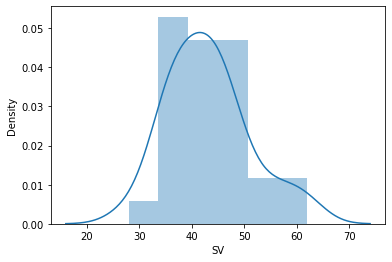

In [81]:
sns.distplot(df['SV'])

Observations:
    1.The values ranges from 30 to 60 and most of the values are between 35 to 48.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SV'>

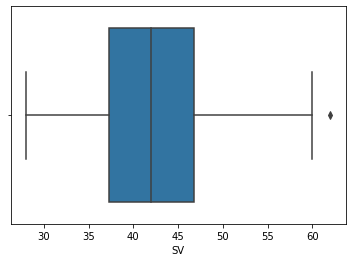

In [82]:
sns.boxplot(df['SV'])

Observations:
    1.One outlier present.

Column 17: E (Errors)

In [83]:
df['E'].describe()

count     30.000000
mean      94.333333
std       13.958889
min       75.000000
25%       86.000000
50%       91.000000
75%       96.750000
max      126.000000
Name: E, dtype: float64

Observations:
    1.The values are ranging from 75 to 126 and there is difference between mean and median so the dist graph will be skewed.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='E', ylabel='Density'>

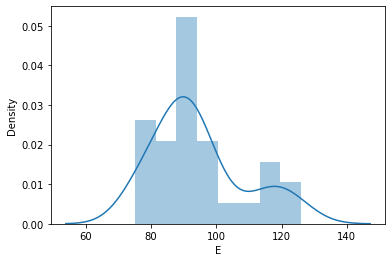

In [84]:
sns.distplot(df['E'])

<AxesSubplot:>

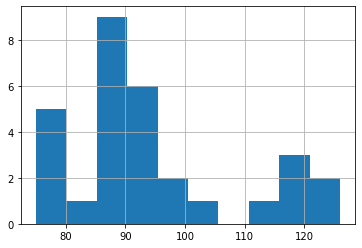

In [85]:
df['E'].hist(grid=True)

Observations:
    1.Most of the value are in the range 70 to 105.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='E'>

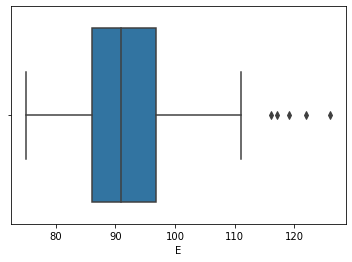

In [86]:
sns.boxplot(df['E'])

Observations:
    1.Many outliers are present.

Conclusion from Univariate Analysis: 1.All columns are fine in terms of skewness and outliers but there are more chances for multicollinearity.

In [87]:
#Checking for the multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
 vif = dict()
 vif["FeatureColumns"] = Data.columns
 vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
 return(pd.DataFrame(vif))

In [88]:
CalculateVIF(df)

,FeatureColumns,VIF
0,W,1164.543214
1,R,3253.807721
2,AB,5181.779465
3,H,4817.334228
4,2B,1157.105781
5,3B,32.435486
6,HR,309.301103
7,BB,302.099558
8,SO,400.292880
9,SB,28.665516


Observations:
1.There is a huge multicollinearity present, If the model accuracy result is not satisified lets take the task of removing it.

Multivariate Analysis

In [91]:
import matplotlib.pyplot as plt

<AxesSubplot:>

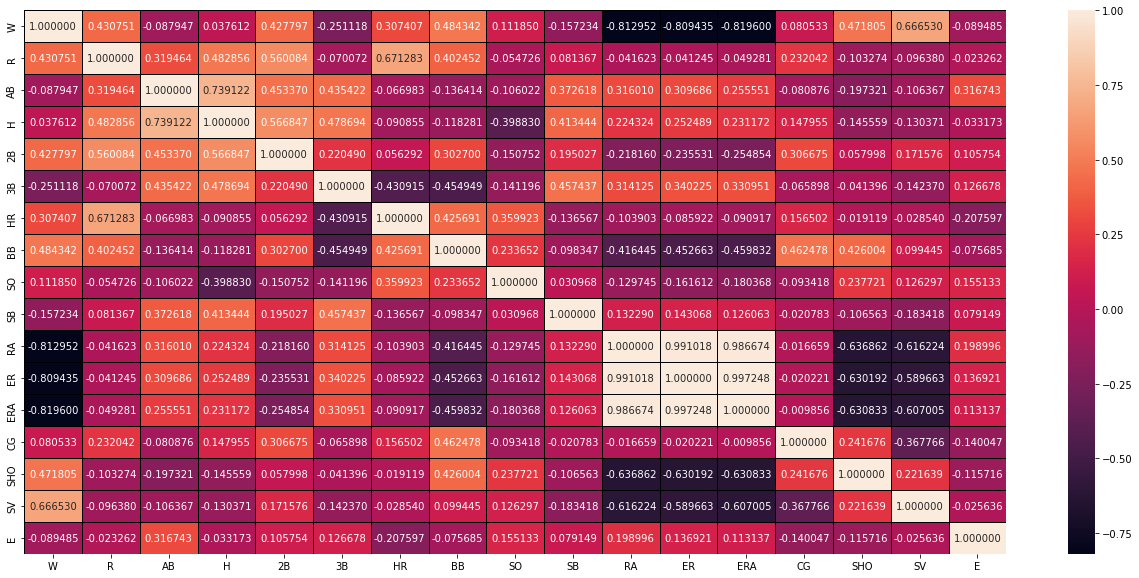

In [92]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt="2f")

Observations:

There are 3 variables which shows same correlation with the other values, we need only one out of those.
1.RA,ER and ERA shows same pattern with other variables.

Lets list out all those variables which have significant correlation with the Target variable.
1.W vs R
2.W vs HR
3.W vs 2B
4.W vs 3B
5.W vs BB
6.W vs RA
7.W vs SHO
8.W vs SV

In [93]:
df1=df.drop(['ER','ERA'],axis=1)

In [94]:
df.shape

(30, 17)

In [95]:
df1.shape

(30, 15)

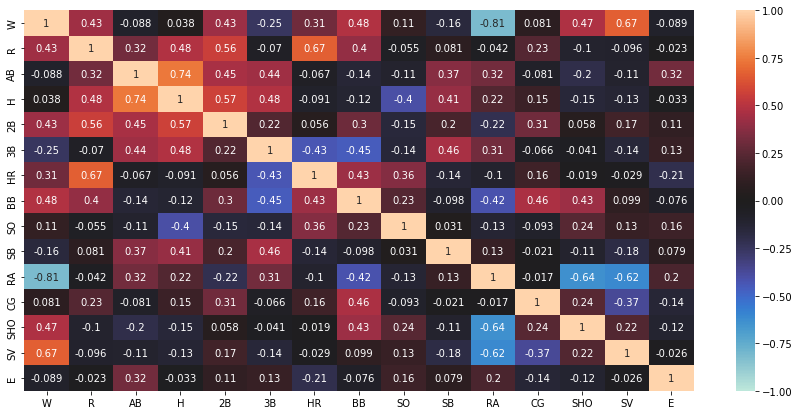

In [96]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    The independent variables which are highly correlated to each other are
1.H vs R
2.2B vs R
3.HR vs R
4.BB vs R
5.H vs AB
6.2B vs AB
7.3B vs AB
8.2B vs H
9.SO vs H
10.BB vs 3B
11.SB vs 3B
13.BB vs RA
14.BB vs CG
15.CG vs SV

Observations:
1.The groupby function not required for multivariate analysis since there are no classes in the target variable.

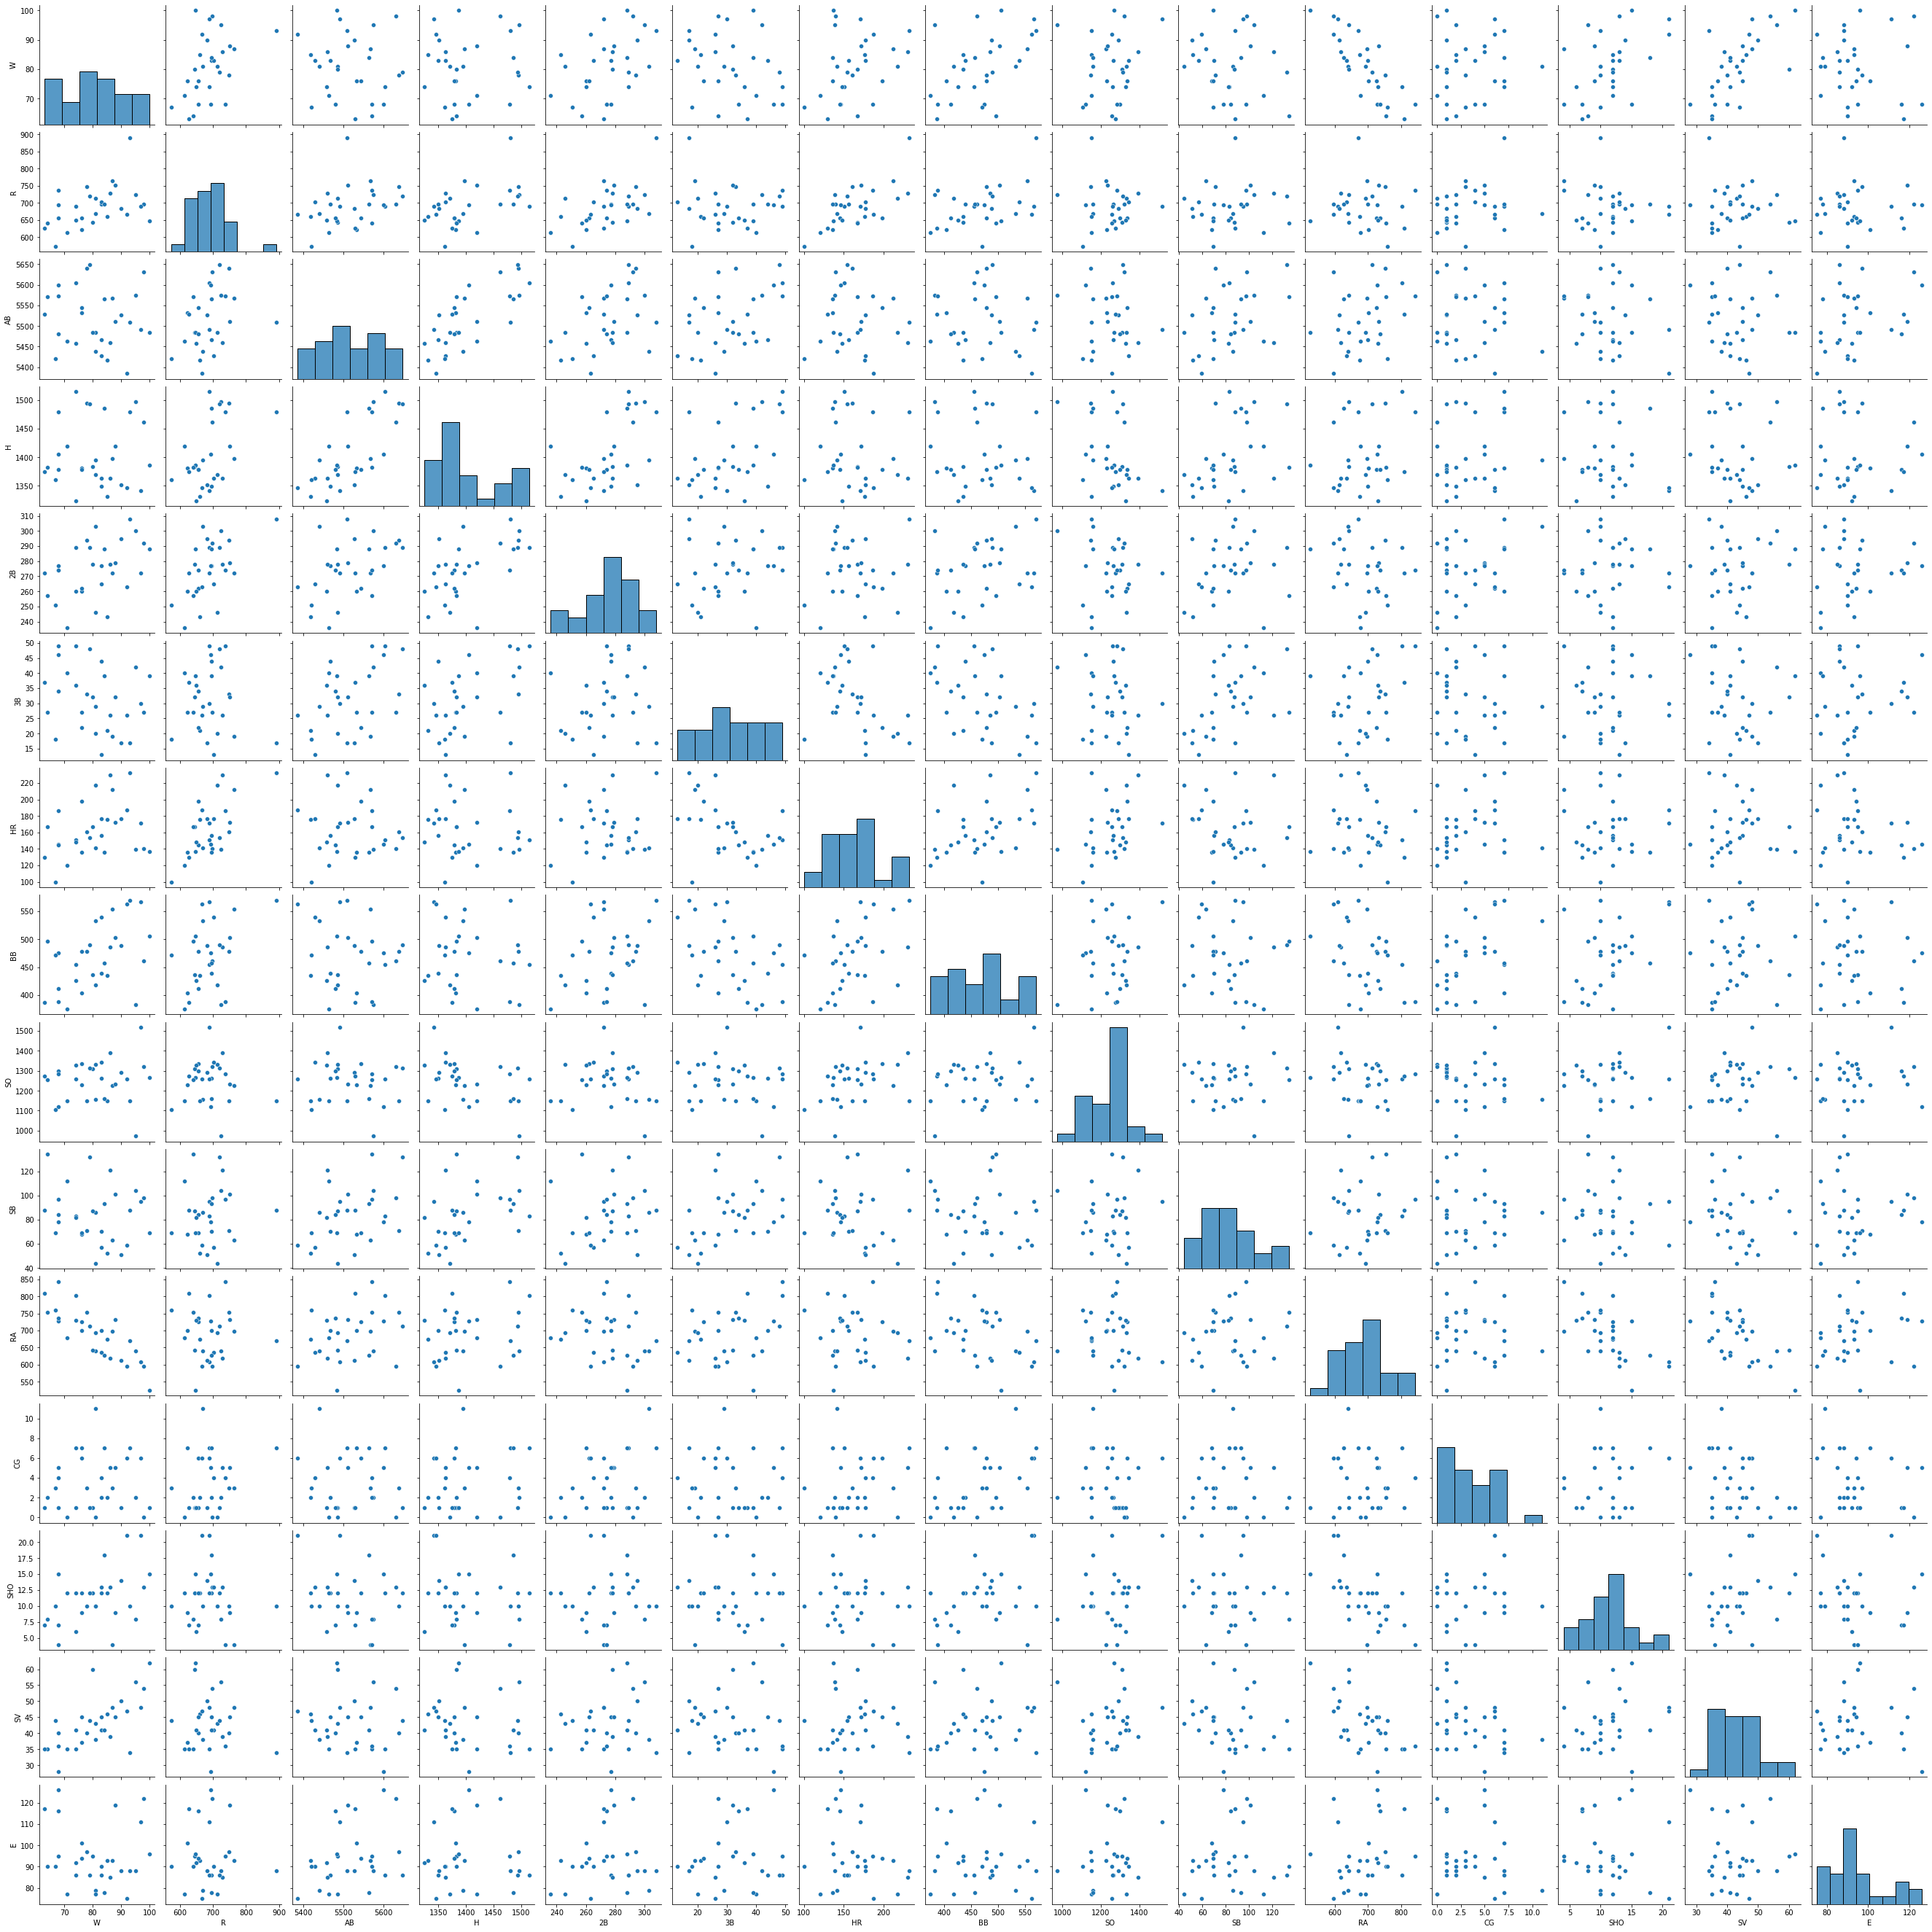

In [97]:
sns.pairplot(df1)

Observations:
1. Analysis is difficult in pairplot. Need to use bi variate analysis to check each combination seperately.

Bi variate Analysis

<AxesSubplot:xlabel='R', ylabel='W'>

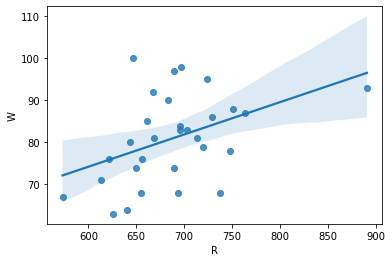

In [98]:
sns.regplot(x='R',y='W',data=df1)

Observations:
  1.As run increases the winning the matches also increases which is obvious.

<AxesSubplot:xlabel='HR', ylabel='W'>

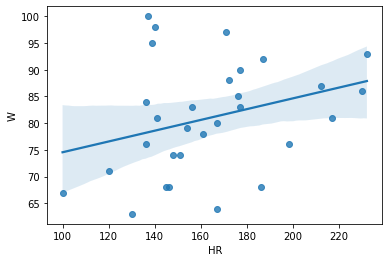

In [99]:
sns.regplot(x='HR',y='W',data=df1)

Observations:
    1.As HR home runs increases the winning the matches also increases.

<AxesSubplot:xlabel='2B', ylabel='W'>

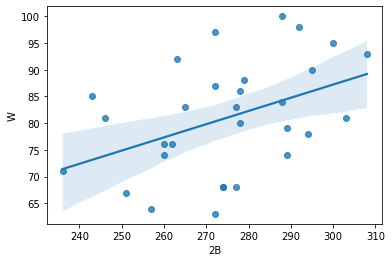

In [100]:
sns.regplot(x='2B',y='W',data=df1)

Observations:
    1.As doubles increases the the winning the matches also increases.

<AxesSubplot:xlabel='3B', ylabel='W'>

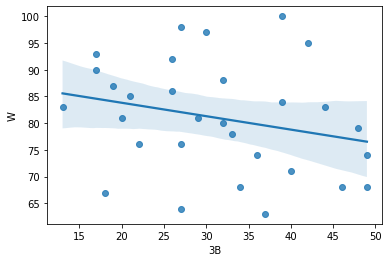

In [101]:
sns.regplot(x='3B',y='W',data=df1)

Observations:
1.Negative slope indicates more threebles will lead to loosing of the match.

<AxesSubplot:xlabel='BB', ylabel='W'>

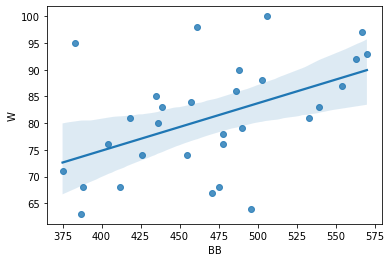

In [102]:
sns.regplot(x='BB',y='W',data=df1)

Observations:
    1.As BB increases the winning is also going to increase.

<AxesSubplot:xlabel='RA', ylabel='W'>

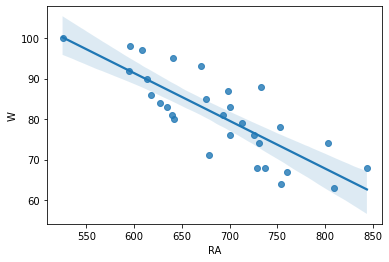

In [103]:
sns.regplot(x='RA',y='W',data=df1)

Observations:
    1.As Run allowed increases the winning is decreasing.

<AxesSubplot:xlabel='SHO', ylabel='W'>

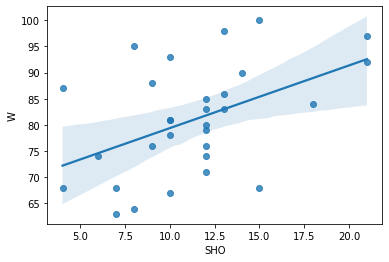

In [104]:
sns.regplot(x='SHO',y='W',data=df1)

Observations:
    1.As SHO increases winning the matches also increases.

<AxesSubplot:xlabel='SV', ylabel='W'>

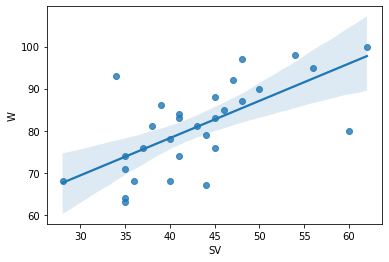

In [105]:
sns.regplot(x='SV',y='W',data=df1)

Observations:
    1.As saves increases, the wins of the matches is increasing.

<AxesSubplot:xlabel='R', ylabel='H'>

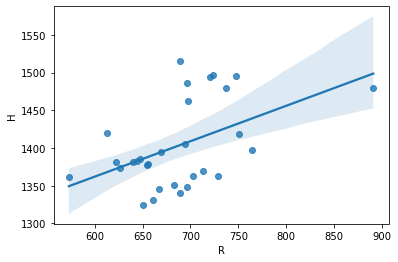

In [106]:
sns.regplot(x='R',y='H',data=df1)

Observations:
    1.As hits increses the runs also will get increased.

<AxesSubplot:xlabel='R', ylabel='2B'>

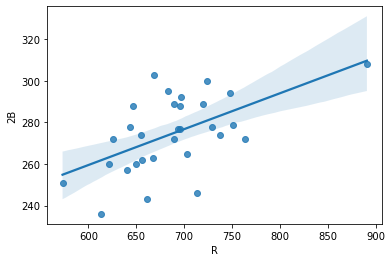

In [107]:
sns.regplot(x='R',y='2B',data=df1)

Observations:
    1.As doubles increase,the runs also increased.

<AxesSubplot:xlabel='R', ylabel='3B'>

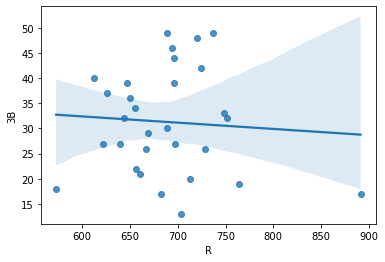

In [108]:
sns.regplot(x='R',y='3B',data=df1)

Observations:
    1.As tribles increase, the runs gradually decrease.

<AxesSubplot:xlabel='H', ylabel='AB'>

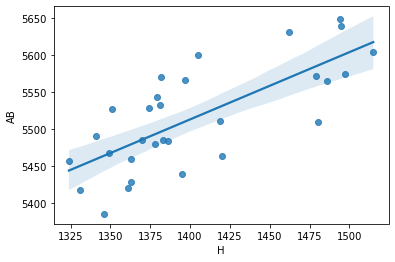

In [109]:
sns.regplot(x='H',y='AB',data=df1)

Observations:
    1.As at bats increase, the hits will also increase.

<AxesSubplot:xlabel='2B', ylabel='AB'>

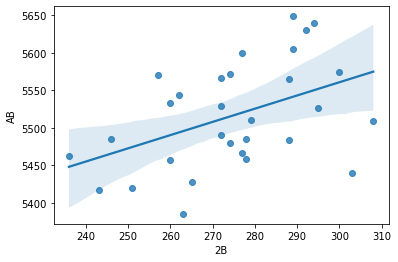

In [110]:
sns.regplot(x='2B',y='AB',data=df1)

Observations:
    1.As at bats increases, the doubles also increases.

<AxesSubplot:xlabel='3B', ylabel='AB'>

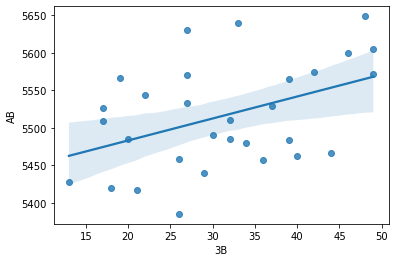

In [111]:
sns.regplot(x='3B',y='AB',data=df1)

Observations:
    1.As at bat increase, the triples also increases.

<AxesSubplot:xlabel='2B', ylabel='H'>

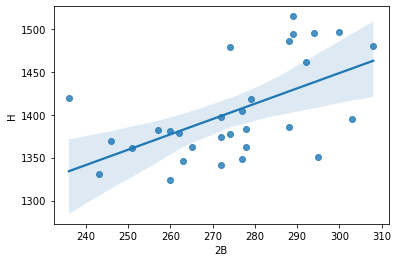

In [112]:
sns.regplot(x='2B',y='H',data=df1)

Observations:
    1.For more 2B there are more Hittings.

<AxesSubplot:xlabel='SO', ylabel='H'>

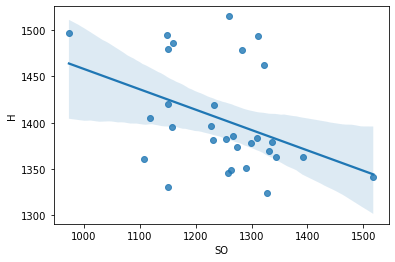

In [113]:
sns.regplot(x='SO',y='H',data=df1)

Observations:
    1.As shoutout increases then hitting decreases.

<AxesSubplot:xlabel='SB', ylabel='H'>

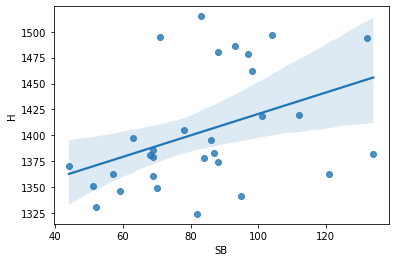

In [114]:
sns.regplot(x='SB',y='H',data=df1)

Observations:
    1.As hittings increases stolen bases also increases.

<AxesSubplot:xlabel='BB', ylabel='3B'>

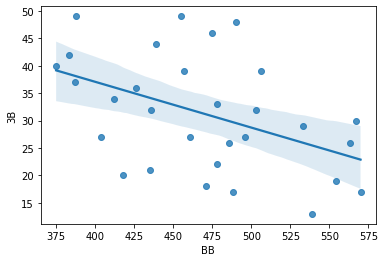

In [115]:
sns.regplot(x='BB',y='3B',data=df1)

Observations:
    1.As walks increases thriples decreases.

<AxesSubplot:xlabel='SB', ylabel='3B'>

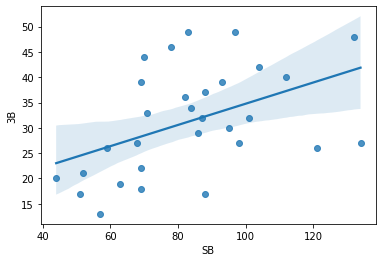

In [116]:
sns.regplot(x='SB',y='3B',data=df1)

Observations:
    1.As thribles increases stolen bases also increases.

<AxesSubplot:xlabel='BB', ylabel='RA'>

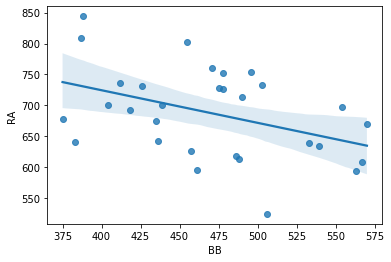

In [117]:
sns.regplot(x='BB',y='RA',data=df1)

Observations:
    1.As walks increases Run allowed decreases.

<AxesSubplot:xlabel='CG', ylabel='SV'>

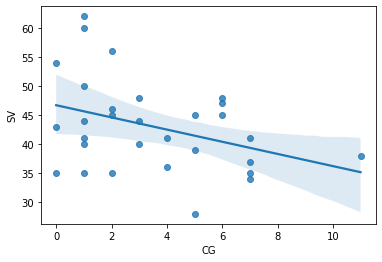

In [118]:
sns.regplot(x='CG',y='SV',data=df1)

Observations:
    1.As saves increases the complete games will decrease

Data cleaning

In [119]:
df1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [121]:
k=df1.applymap(np.isreal)

In [122]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

W
True    30
Name: W, dtype: int64


R
True    30
Name: R, dtype: int64


AB
True    30
Name: AB, dtype: int64


H
True    30
Name: H, dtype: int64


2B
True    30
Name: 2B, dtype: int64


3B
True    30
Name: 3B, dtype: int64


HR
True    30
Name: HR, dtype: int64


BB
True    30
Name: BB, dtype: int64


SO
True    30
Name: SO, dtype: int64


SB
True    30
Name: SB, dtype: int64


RA
True    30
Name: RA, dtype: int64


CG
True    30
Name: CG, dtype: int64


SHO
True    30
Name: SHO, dtype: int64


SV
True    30
Name: SV, dtype: int64


E
True    30
Name: E, dtype: int64




Observations:
    1.The data is already cleaned.

Removing the Outliers

Removing the outliers by zscore method

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


Observations:
    1. Since loss percentage is less than 7 we can proceed further with this method.

Splitting the target variables

In [124]:
df2.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')

In [125]:
df2.shape

(29, 15)

In [126]:
x=df2.drop('W',axis=1)
y=df2['W']

In [127]:
x.shape

(29, 14)

In [128]:
y.shape

(29,)

Removal of skewness

In [129]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [130]:
from scipy import stats
from scipy.stats import boxcox
k=np.sqrt(x['CG'])
k.skew()

-0.2606778075812151

In [131]:
x['CG']=np.sqrt(x['CG'])

In [132]:
k=np.sqrt(x['SHO'])
k.skew()

-0.08580249517743828

In [133]:
x['SHO']=np.sqrt(x['SHO'])

In [134]:
k=np.sqrt(x['SV'])
k.skew()

0.37027995254293594

In [135]:
x['SV']=np.sqrt(x['SV'])

In [136]:
x['E']=np.cbrt(x['E'])

In [137]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.671748
dtype: float64

In [138]:
x['E']=stats.boxcox(x['E'])[0]

In [139]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.000000
dtype: float64

Observations:
    1.Now Skewness is in range.

Standard Scaling

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scale=StandardScaler()

In [142]:
x1=scale.fit_transform(x)

In [143]:
x1.shape

(29, 14)

In [144]:
x.shape

(29, 14)

# Building the model

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=45)

In [146]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8682516673294938 on random state 42


In [147]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [148]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (20, 14)
x test shape (9, 14)


y train shape: (20,)
y test shape (9,)


In [149]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.868
RMSE: 3.594
mean absolute error: 2.988


In [150]:
#lasso model
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.868
RMSE: 3.603
mean absolute error: 2.991


In [151]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.868
RMSE: 3.602
mean absolute error: 2.998


In [152]:
#ElasticNet model
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.867
RMSE: 3.607
mean absolute error: 3.0


In [153]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.403
RMSE: 7.649
mean absolute error: 6.385


In [154]:
svr = SVR()
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.063
RMSE: 9.583
mean absolute error: 8.35


Cross validation score

In [155]:
models=[ln,ls,rd,enr,rf,svr]
for m in models:
    
    score=cross_val_score(m,x1,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.217


Lasso(alpha=0.001) score is:
0.219


Ridge(alpha=0.01) score is:
0.219


ElasticNet(alpha=0.001) score is:
0.22


RandomForestRegressor(n_estimators=1000) score is:
-0.584


SVR() score is:
-0.311




Observations:



The difference between r2 score and cross val scores are:


    1.Linear Regression:0.651
    2.Lasso Regression :0.649
    3.Ridge Regression :0.649
    4.ElasticNet       :0.22
    5.Random Forest    :0.938
    6.Support Vector Regressor:0.374

Even though we got high r2 score for linear regression but there is more overfitting compared to svr , so we can choose SVR as the best model because it has got least difference between r2 score and cross validation score.

Hyper parameter tuning

In [156]:
svr=SVR()
grid_param={
    'kernel':['rbf','linear','poly','sigmoid'],
    'gamma':['scale','auto'],
    'shrinking':[True,False],
    'verbose':[True,False],
    'epsilon':[0.01, 0.1, 0.5, 1, 2, 4]
}

gd_sr=GridSearchCV(estimator=svr,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x1,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [157]:
svr1=SVR(kernel='linear',epsilon=0.5,gamma='scale',shrinking=True,verbose=True)

In [158]:
svr1.fit(x_train, y_train)
predsvr=svr1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

[LibSVM]r2 score is : 0.777
RMSE: 4.677
mean absolute error: 3.877


Observations:

By hyper parameter tuning we increased r2 score about 12.6 times.
The maximum r2_score we got is 0.77 with least overfitting problems.

Saving the model

In [159]:
import joblib
joblib.dump(svr1,'svrbaseball.obj')

['svrbaseball.obj']